## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [4]:
#1 Import the dataset (Housing.csv) and look at the top five rows
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
#2 Check the shape of the DataFrame (rows, columns)
import pandas as pd

# Load the dataset
df = pd.read_csv("Housing.csv")

# Check the shape (number of rows and columns)
print("Shape of the dataset:", df.shape)


Shape of the dataset: (545, 13)


In [5]:
#3 Look at the data types of the columns
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [6]:
#4 Check for missing  values if any, replace with appropriate values
print("\nMissing values in dataset:")
print(df.isnull().sum())


Missing values in dataset:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [7]:
#5 Prepare  X (independent variables) and y (dependent variable)
X = df.drop(columns=['price'])  # All columns except price
y = df['price']  # Target variable

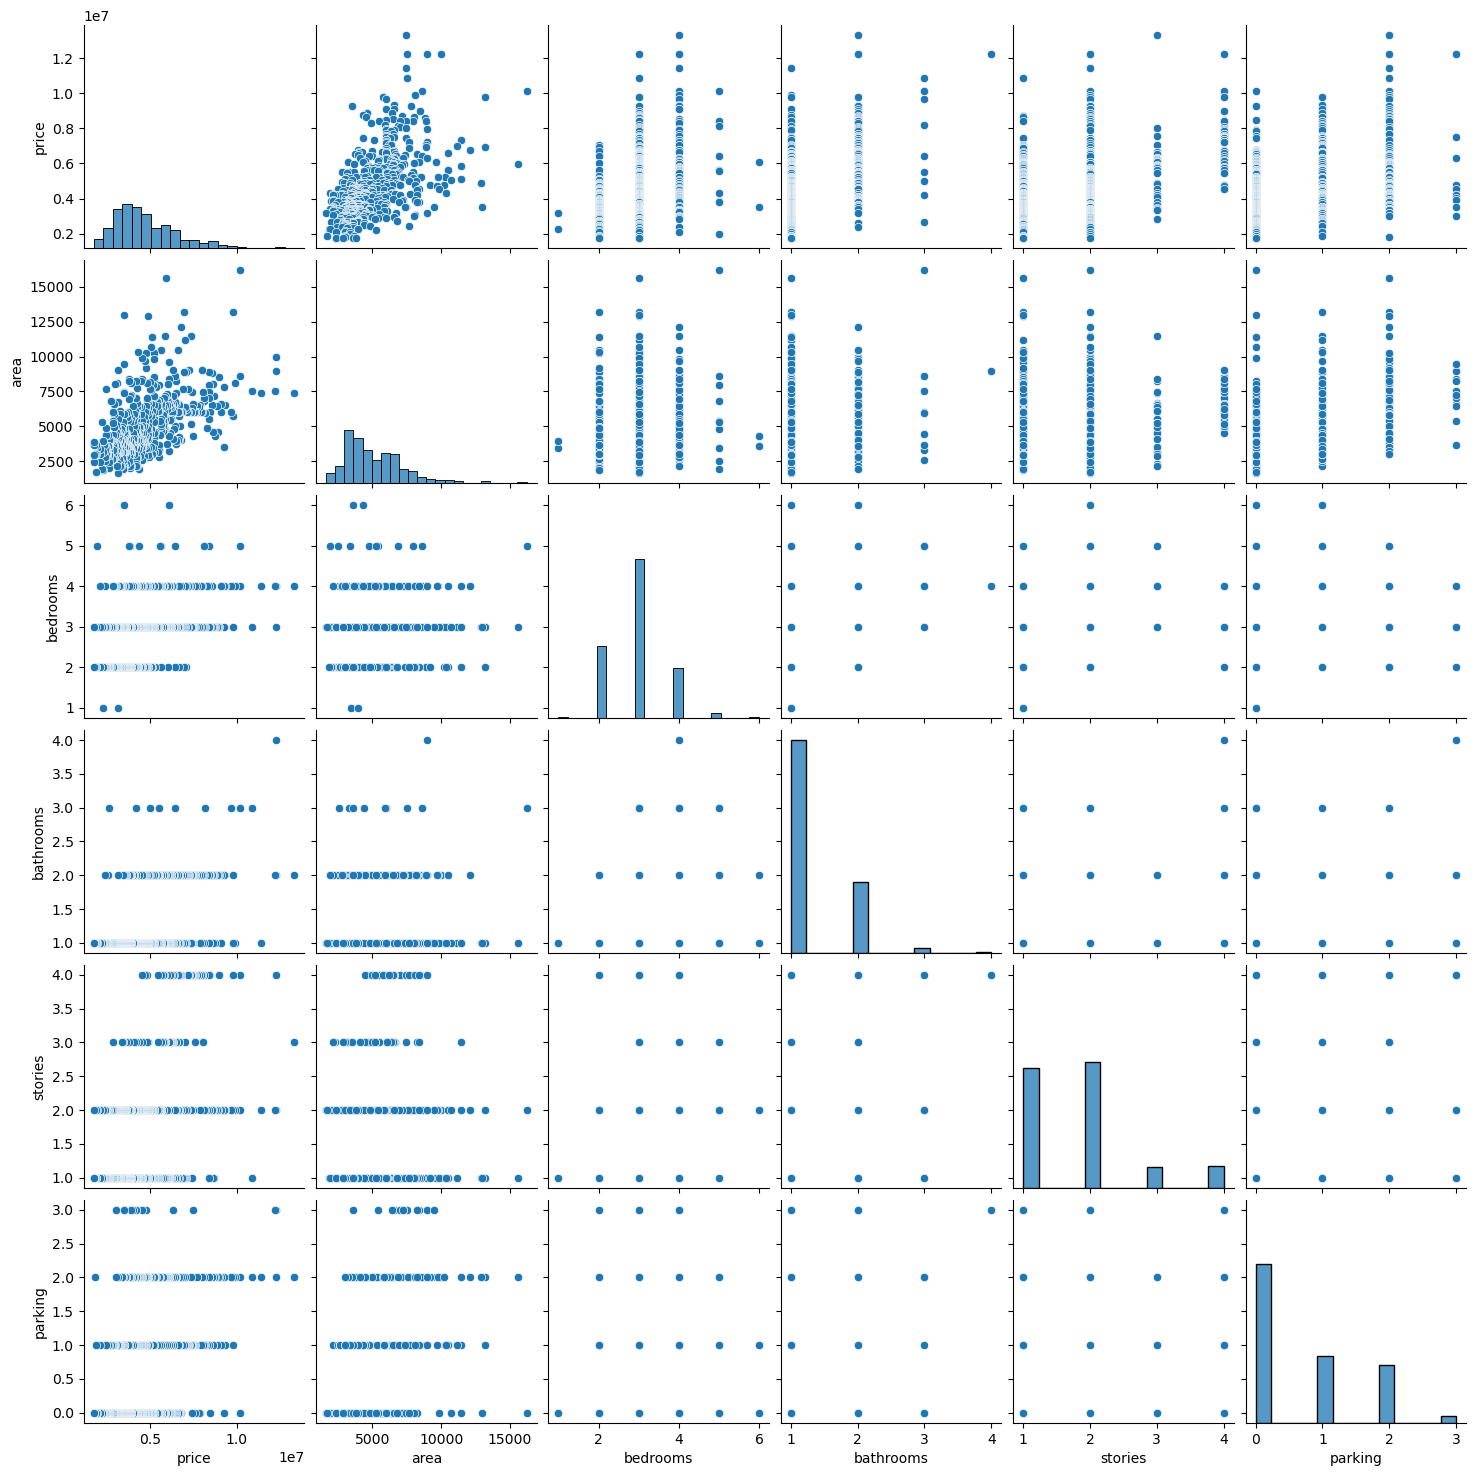

In [8]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots
sns.pairplot(df)
plt.show()

In [10]:
#7 Encoding categorical data in X
X = pd.get_dummies(X, drop_first=True)

In [11]:
#8  Avoiding the Dummy Variable Trap
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
#9 Apply feature scaling on numerical variables
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [13]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
#11 Fitting Multiple Linear Regression to the Training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
#12 Predict on the train set and calculate the error = y_pred - y_train
y_train_pred = model.predict(X_train)
train_error = y_train - y_train_pred

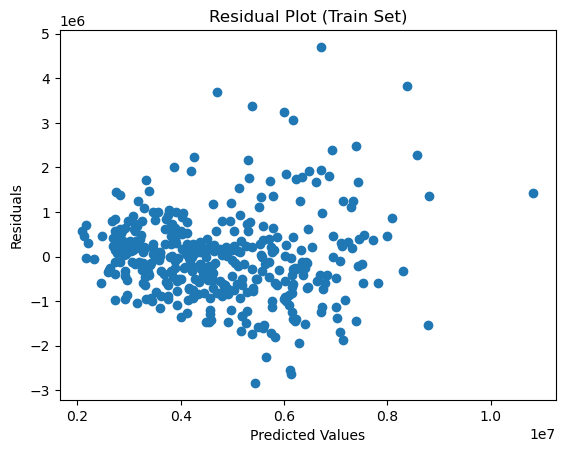

In [16]:
#13  Residual plot - plot y_pred in x axis and errors in y axis
plt.scatter(y_train_pred, train_error)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Train Set)")
plt.show()

In [17]:
#14  Predic on the test set
y_test_pred = model.predict(X_test)

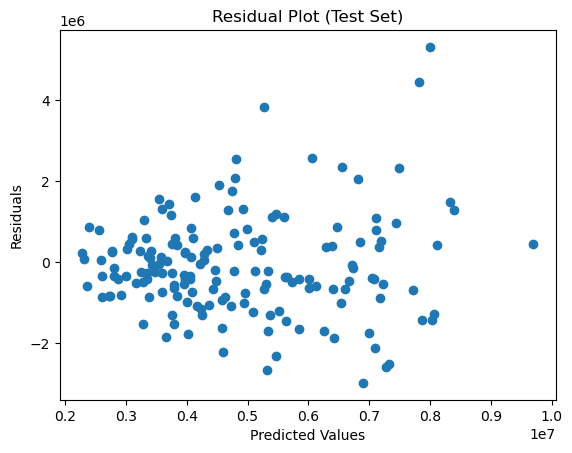

In [19]:
#15 Residual plot - plot y_pred in x axis and errors in y axis
test_error = y_test - y_test_pred
plt.scatter(y_test_pred, test_error)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Test Set)")
plt.show()

In [20]:
#16 Print Mean Squared Error and R Squared Value
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print(f"\nMean Squared Error: {mse}")
print(f"R-Squared Value: {r2}")


Mean Squared Error: 1523019469501.2908
R-Squared Value: 0.6463350878895878


In [21]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)
n = X_train.shape[0]  # Number of samples
p = X_train.shape[1]  # Number of predictors
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print(f"Adjusted R-Squared Value: {adjusted_r2}")

Adjusted R-Squared Value: 0.6338074479510718
